# 0. 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

In [ ]:
# 데이터 불러오기
train =  pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/따릉이/train.csv',encoding='cp949')# 모델 학습 파일
test =  pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/따릉이/test.csv',encoding='cp949')# 모델 시험지 파일
submission =  pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/따릉이/submission.csv', encoding='cp949')#답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [ ]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [ ]:
# 데이터 행, 열 개수 확인: shape()
train.shape

(1459, 11)

In [ ]:
test.shape

(715, 10)

In [ ]:
submission.shape

(715, 2)

### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
# 특정 칼럼의 데이터 확인: dtype()
train.dtypes

id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
count                     float64
dtype: object

In [ ]:
# 데이터 칼럼 이름 추출: columns()
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [ ]:
#결측치 개수 확인: isnull(),sum()
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

#### missingno를 이용하여 결측치를 시각화 해보기
- 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지이다.

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


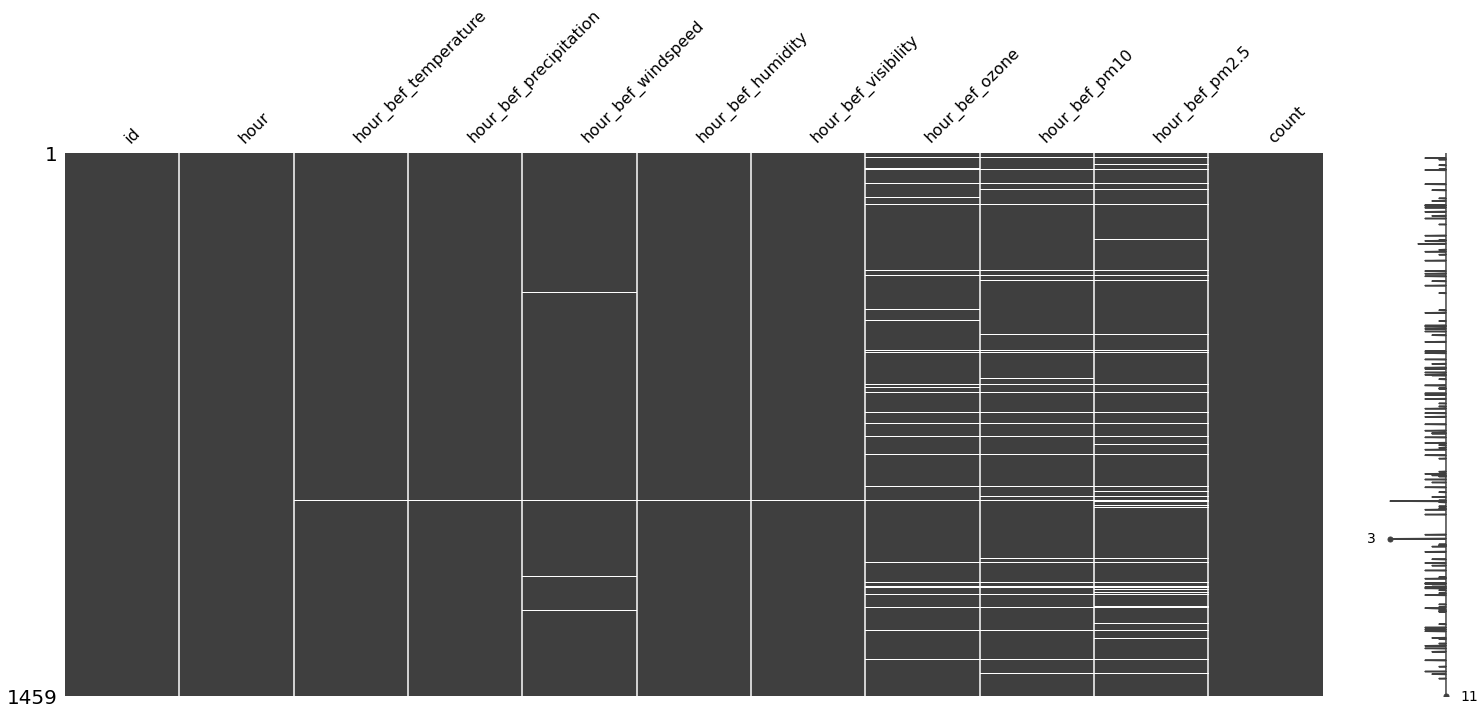

In [ ]:
# 결측치 시각화 모듈: missingno - missingno.matrix()
import missingno as mn
mn.matrix(train)

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
#groupby 사용하기

##시각화

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

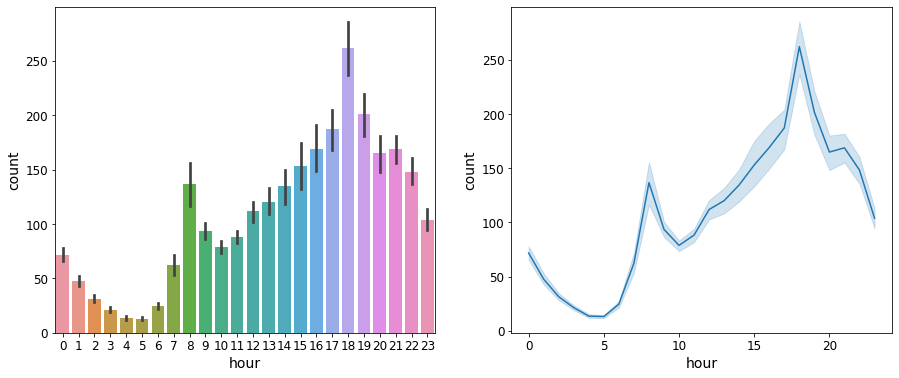

In [ ]:
# 시간대별 대여량 시각화
#plt.plot('hour', 'count', '*', data = train)

figure, (ax1,ax2) = plt.subplots( ncols = 2)
figure.set_size_inches(15,6)

sns.barplot(data=train, x='hour', y = "count", ax = ax1)
sns.lineplot(data=train, x='hour', y = "count", ax = ax2)

In [ ]:
# 어떤 데이터를 시각화 해볼지 컬럼 이름 확인
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

In [ ]:
# pointplot 으로 시간대별, 대여량을 worjingday, datofweek, weather, season 별로 확인해보자.


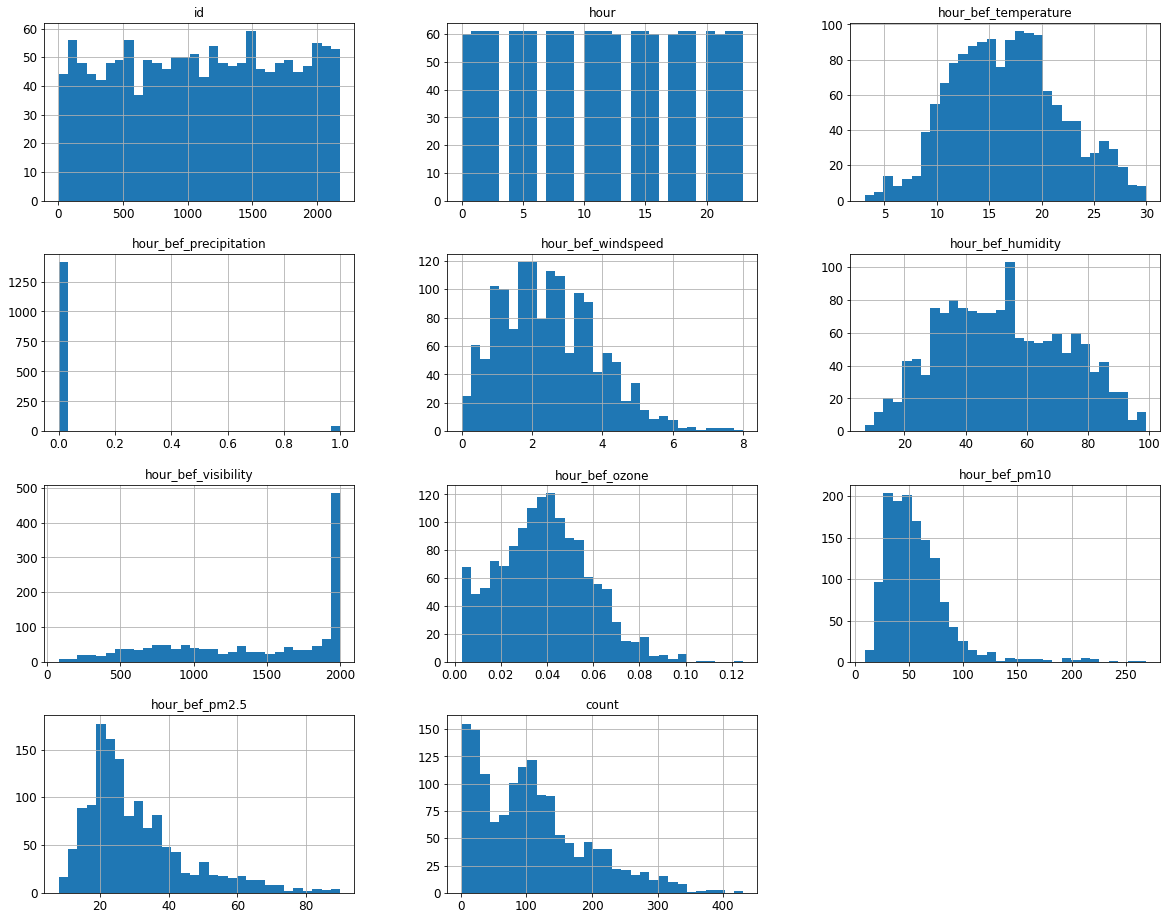

In [ ]:
#.hist(bins=, figsize=(20,16))
#plt.show()

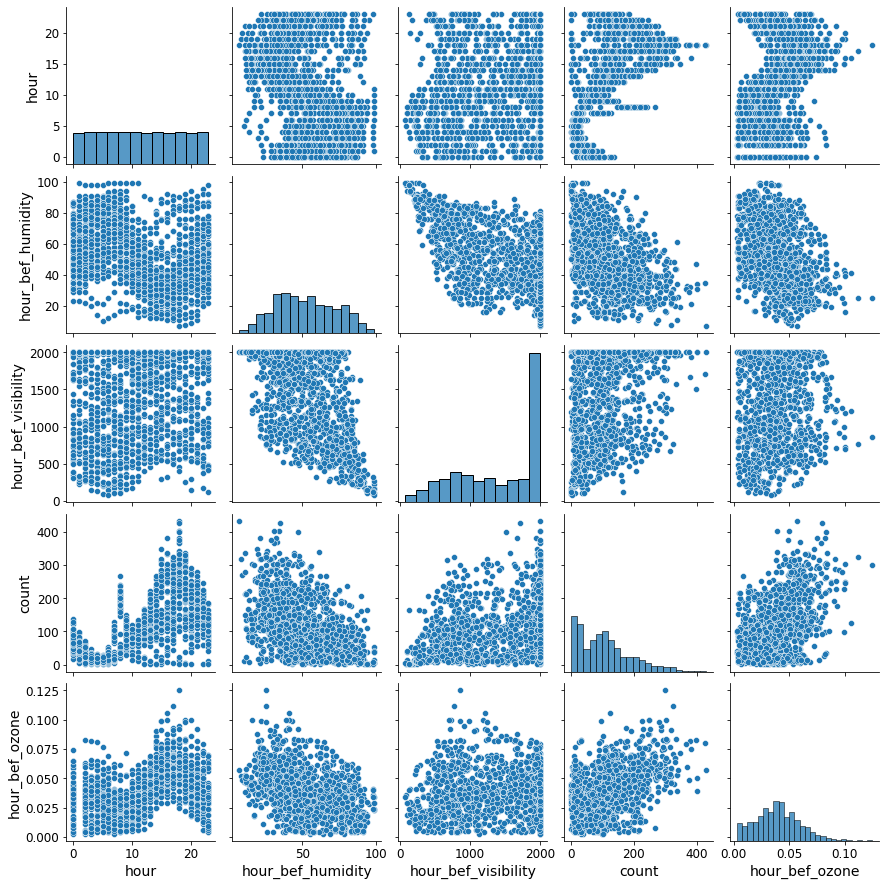

In [ ]:
#sns.pairplot()

In [ ]:
# 상관계수 => correlation coefficient
# .corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [ ]:
#corr_matrix =
# 종속변수와 독립변수간의 상관계수 
#corr_matrix[].sort_values(ascending=False)

count                     1.000000
hour                      0.626047
hour_bef_temperature      0.619404
hour_bef_ozone            0.477614
hour_bef_windspeed        0.459906
hour_bef_visibility       0.299094
id                       -0.002131
hour_bef_pm10            -0.114288
hour_bef_pm2.5           -0.134293
hour_bef_precipitation   -0.163985
hour_bef_humidity        -0.471142
Name: count, dtype: float64

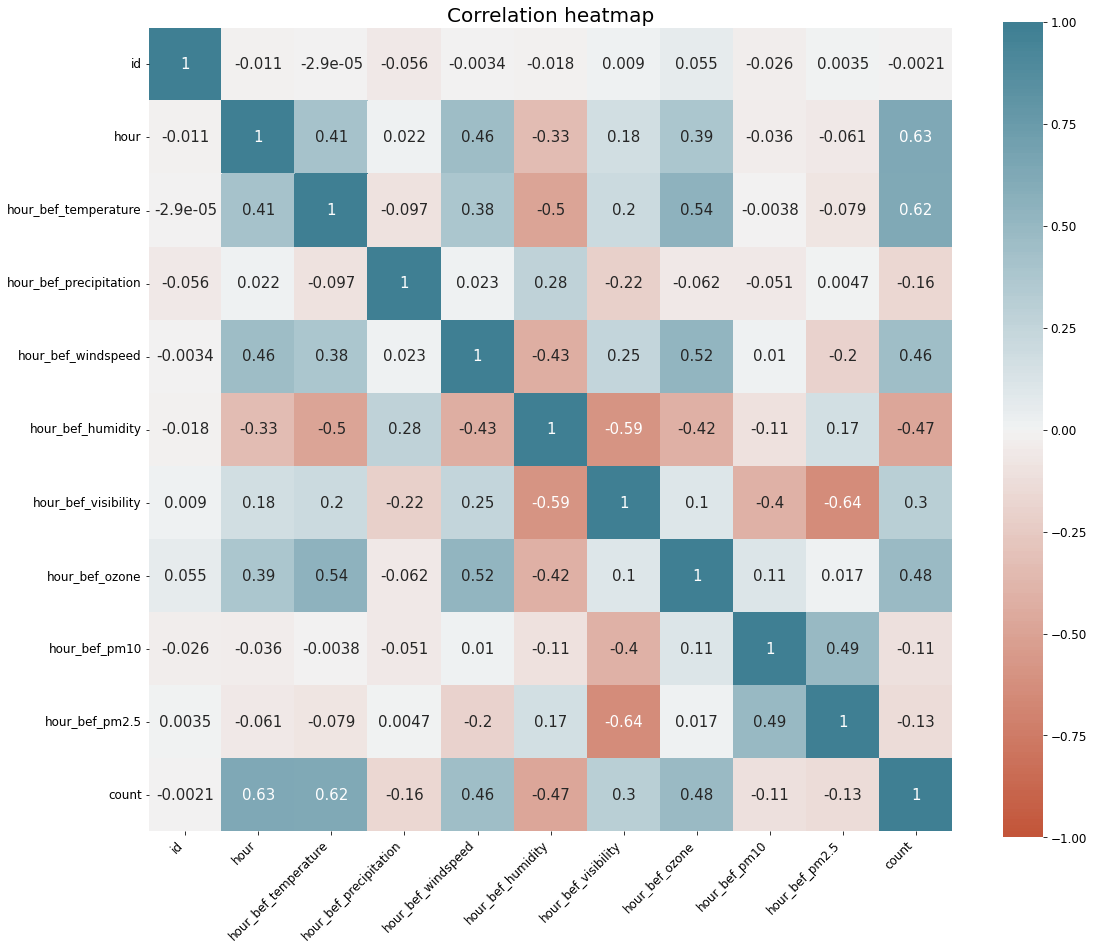

In [ ]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(
    , # 비교할 컬럼 data
    vmin=-1, # 최솟값
    vmax=1, # 최댓값
    center=0, # 중앙값 선정 
    cmap=sns.diverging_palette(20, 220, n=200), # 히트맵의 색 설정
    square=True,
    annot=True, # 각 cell의 값 표기 유무
    annot_kws={"size": 15} # 히트맵 안 수치 크기 조절
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # 글자 각도 45도 기울이기
    horizontalalignment='right',
)

plt.title('Correlation heatmap', fontsize=20) # 그래프 제목 설정
plt.show()

### sns.lmplot()

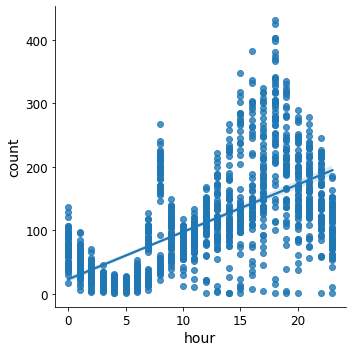

In [ ]:
#sns.lmplot(x = '', y = '', data = )

### sns.kdeplot()


- 커널 밀도 추정(KDE: Kernel Density Estimator) 
- 평균과 신뢰구간이 비슷한 경우 최대값, 최소값은 어떤지, 어떤 모양으로 얼마나 퍼져 있는지 분포가 확인이 어렵다.
- 보통 분포를 확인할 때 히스토그램(histogram)을 많이 활용하곤 한다.
- 하지만 히스토그램은 구간을 어떻게 설정하냐에 따라 결과물이 매우 달라져서, 엉뚱한 결론과 해석을 내릴 수 있기 때문에 조심해야한다.
- 그래서 그 대안으로 많이 쓰이는 게 커널 밀도 추정(KDE: Kernel Density Estimator)이다.

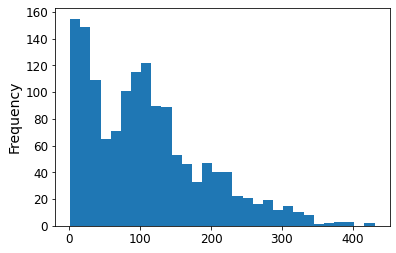

In [ ]:
train['count'].plot(kind = 'hist', bins = 30)

In [ ]:
#sns.kdeplot()

### sns.boxplot()

- describe()함수를 사용한 결과 값을 그래프로 나타냄
- 이상치 확인에 용이함

In [ ]:
train[['hour','hour_bef_humidity']].groupby('hour').describe()

hour_bef_humidity                                                      
                 count       mean        std   min    25%   50%    75%   max
hour                                                                        
0                 59.0  58.169492  17.093205  23.0  45.50  59.0  73.00  87.0
1                 61.0  60.459016  17.403614  23.0  48.00  62.0  76.00  99.0
2                 61.0  61.721311  17.410850  22.0  47.00  64.0  76.00  98.0
3                 61.0  63.131148  17.259273  20.0  50.00  64.0  77.00  98.0
4                 61.0  64.573770  17.691296  14.0  52.00  66.0  79.00  98.0
5                 61.0  66.000000  17.826011  10.0  53.00  68.0  80.00  98.0
6                 61.0  67.409836  17.456018  12.0  55.00  71.0  80.00  99.0
7                 61.0  67.934426  17.133660  14.0  55.00  71.0  80.00  99.0
8                 61.0  64.049180  16.837880  17.0  53.00  65.0  75.00  99.0
9                 61.0  57.803279  16.514458  17.0  45.00  58.0  68.00  99.0
10                61.0  51.622951  15.844204  18.0  40.00  52.0  61.00  99.0
11                61.0  46.262295  15.554101  13.0  35.00  44.0  56.00  99.0
12                61.0  42.147541  14.768024  14.0  31.00  41.0  52.00  91.0
13                60.0  38.850000  14.347769  12.0  29.75  36.5  48.00  89.0
14                61.0  37.573770  16.690775  12.0  27.00  32.0  44.00  81.0
15                61.0  37.393443  17.980803  12.0  25.00  33.0  43.00  89.0
16                60.0  36.450000  18.421087  11.0  23.75  33.0  39.25  92.0
17                60.0  38.883333  18.931716  11.0  25.00  35.5  45.25  91.0
18                60.0  40.450000  18.709578   7.0  29.00  35.5  49.00  90.0
19                61.0  43.573770  19.660840   8.0  29.00  40.0  53.00  92.0
20                61.0  47.573770  19.796851   9.0  33.00  44.0  60.00  94.0
21                60.0  50.450000  18.677844  11.0  37.00  48.0  64.00  91.0
22                61.0  53.950820  18.410528  20.0  39.00  54.0  68.00  95.0
23                61.0  56.393443  17.900911  22.0  43.00  57.0  69.00  98.0

In [ ]:
# boxplot 활용 시간별 습도의 4분위수 확인
plt.figure(figsize = (10,6))
sns.boxplot(x = '', y = '', data = )

### sns.jointplot()

In [ ]:
sns.jointplot('', '', data = , alpha = 0.1)

### sns.violinplot()

In [ ]:
sns.violinplot(x = '', y = '', data = )

### sns.relplot()
- relation plot
- 통계적 관계를 나타낼 수 있는 그래프

In [ ]:
# 12시 이후 데이터 확인
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [ ]:
# 12시 이후 습도와 시간에 따른 비정보와 대여량
# 색깔 = 비 여부
# 크기 = 대여량 

sns.relplot(x = '', y = '', hue = '', size = '', data = train[train['hour'] > 12])

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isnull()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

#### for 문을 활용해 결측치를 평균값으로 대체하기

In [ ]:
train_isna_sum = train.isna().sum()

In [ ]:
# 결측치가 있는 컬럼 확인
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
# 결측치 평균값으로 대체하는 함수 생성
def fill_bicycle_na(df, column) :
    df[column] = df[column].fillna(value = df[column].mean())

In [ ]:
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


#### test 데이터에도 동일하게 적용

In [ ]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


## 4. 모델 구축
## Initial Modeling  

여러 모델이 있지만, 우선 생각해 볼 수 있는 모델들은 다음과 같습니다.  
- 단순선형회귀
- 앙상블 기법 : 랜덤포레스트 , XGBoost, LightGBM 

###### XGBoost의 적용
- 여기서는 앙상블 모델을 적용하고자 합니다. 특히 트리모델을 활용하는 이유는 특정 기준으로 날씨가 매우 나쁘거나 하면 선제적으로 쳐내어 낮은 값을 할당해주겠다는 기대를 할 수 있어, 트리모델 쪽 앙상블 기법을 적용하겠습니다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_tree, plot_importance

#### X, y 분리

### 학습

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

[01:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### 검증
#### neg_mean_squared_error

- 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대합니다. 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수를 사용합니다. 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
%%time
score = cross_val_score(model1, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2769.785736909061
CPU times: user 43.3 ms, sys: 24.5 ms, total: 67.7 ms
Wall time: 41.2 ms


### 모델 RMSE 계산 해보기

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(, )**0.5

print('RMSE :', RMSE)

RMSE : 14.759167109491145


##PyCaret

In [ ]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

     |████████████████████████████████| 320 kB 10.1 MB/s 
     |████████████████████████████████| 636 kB 69.3 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
     |████████████████████████████████| 16.9 MB 55.9 MB/s 
     |████████████████████████████████| 137 kB 95.2 MB/s 
     |████████████████████████████████| 167 kB 56.2 MB/s 
     |████████████████████████████████| 1.7 MB 49.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 1.7 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 1.3 MB 61.3 MB/s 
     |████████████████████████████████| 3.3 MB 48.0 MB/s 
     |████████████████████████████████| 2.0 MB 53.9 MB/s 
     |████████████████████████████████| 6.8 MB 58.0 MB/s 
     |████████████████████████████████| 268 kB 78.1 MB/s 
     |████████████████

### 최종 답안 저장

In [ ]:
#.to_csv('', index = False)